# Лабораторна робота №8

## Тема: Структура даних граф. Алгоритми на графах

#### Виконала: Лабущак Анжела  
#### Група: КН-24-1  

## 1. Побудова графа та його вiзуалiзацiя

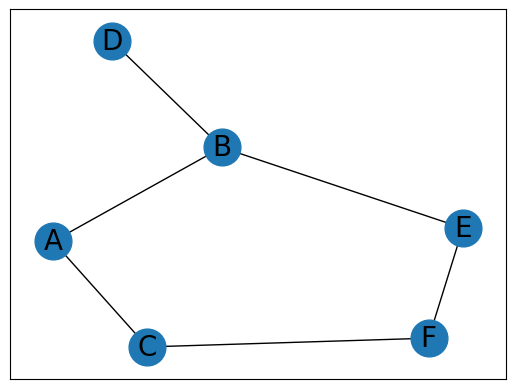

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('E', 'F')])

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=700, font_size=20, font_family='sans-serif')
plt.show()

## 2. DFS: обходи та шляхи

In [10]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    for next in set(graph.adj[start].keys()) - visited:
        dfs(graph, next, visited)
    return visited

dfs(G, 'C')

# Шляхи

def dfs_paths(graph, start, goal, path=None):
    if path is None:
        path = [start]
    if start == goal:
        yield path
    for next in set(graph.adj[start].keys()) - set(path):
        yield from dfs_paths(graph, next, goal, path + [next])

list(dfs_paths(G, 'C', 'F'))

[['C', 'A', 'B', 'E', 'F'], ['C', 'F']]

## 3. BFS: пошук у ширину

In [13]:
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next in set(graph.adj[vertex].keys()) - set(path):
            if next == goal:
                yield path + [next]
            else:
                queue.append((next, path + [next]))

list(bfs_paths(G, 'A', 'F'))

[['A', 'C', 'F'], ['A', 'B', 'E', 'F']]

## 4. Дейкстра

In [16]:
G = nx.path_graph(5)
length, path = nx.single_source_dijkstra(G, 0)
print(length)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


## 5. Беллман-Форд

In [19]:
length = nx.single_source_bellman_ford_path_length(G, 0)
print(length)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


In [ ]:
Контрольнi запитання